abess-universal 算法复杂度证明 技术性条件验证

In [1]:
import math
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import fsolve

Text(0, 0.5, 'convergence rate')

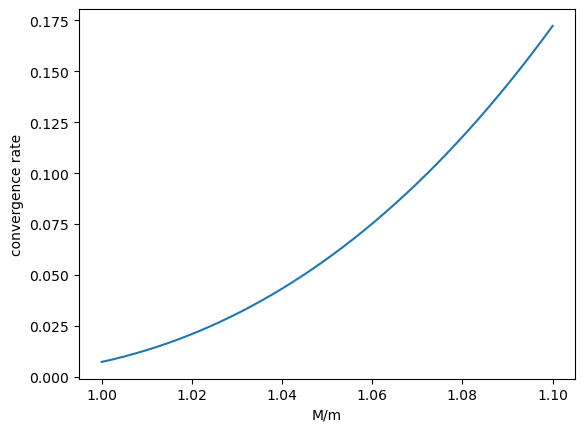

In [46]:
def f(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    d = (1+np.sqrt(x))*np.sqrt((z+y)**2+(y+z*y+z**2+z)**2)
    return (y**2+x*y**2/2+(2*y*z+x*y*z/2+y)*d+(x*z**2/2+z**2+x/2)*d**2) / (0.5 - y * np.sqrt(2))**2

x = np.linspace(1, 1.1, 1000)
plt.plot(x, [f(i,0.01) for i in x])
plt.xlabel('M/m')
plt.ylabel('convergence rate')

f为 $\frac{\mathcal{L}(\tilde{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)}{\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)} $

In [19]:
def f(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    d = (1+np.sqrt(x))*np.sqrt((z+y)**2+(y+z*y+z**2+z)**2)
    return (y**2+x*y**2/2+(2*y*z+x*y*z/2+y)*d+(x*z**2/2+z**2+x/2)*d**2) / (0.5-y**2-y*z-y-x*y**2/2-x*y*z-x*z**2/2-y*z-z**2)

首先考察f在现有技术性条件下，是否严格小于1

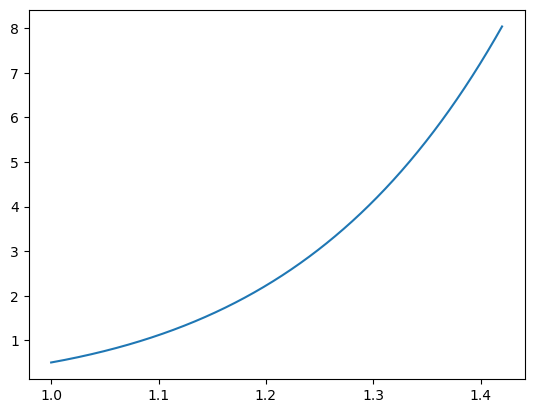

In [17]:
x = np.linspace(1,1.42,1000)
y = np.array([f(i) for i in x])
plt.plot(x,y)

Text(0, 0.5, 'convergence rate')

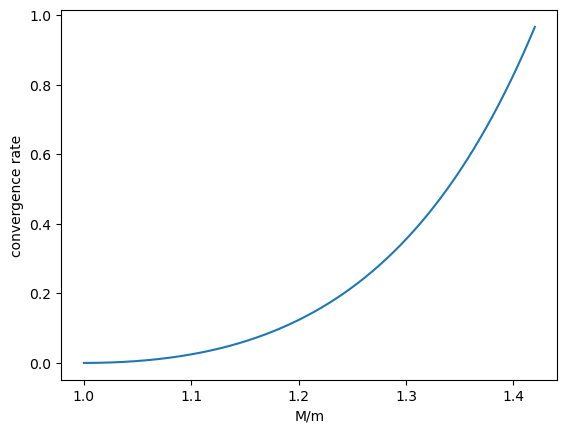

In [55]:
x = np.linspace(1, 1.42, 1000)
plt.plot(x, [f(i,0) for i in x])
plt.xlabel('M/m')
plt.ylabel('convergence rate')

Text(0, 0.5, 'something about gradient')

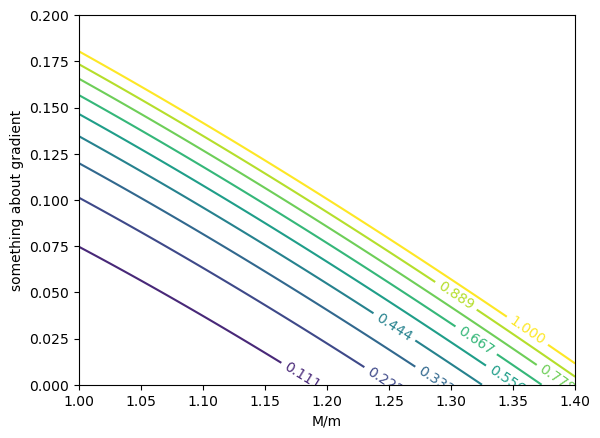

In [57]:
x = np.linspace(1, 1.4, 1000)
y = np.linspace(0, 0.2, 1000)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
c=plt.contour(X, Y, Z, levels=np.linspace(0, 1.0, 10))
plt.clabel(c, inline=True, fontsize=10)
plt.xlabel('M/m')
plt.ylabel('something about gradient')



检查f在x接近1时的大小

In [4]:
f(1)

0.9942558542438333

验证是否有二次收敛率

f_q为 $\frac{\mathcal{L}(\tilde{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)}{(\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*))^2} $

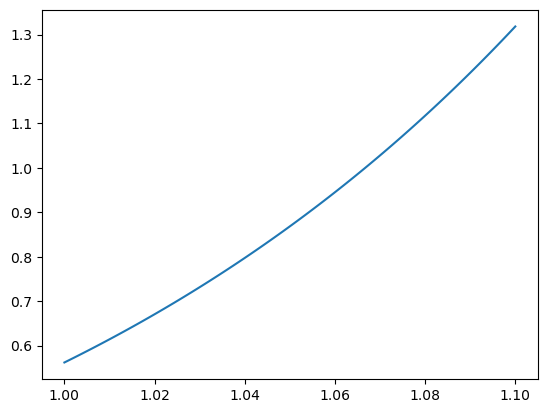

In [42]:
def f_q(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    d = (1+math.sqrt(x))*math.sqrt((z+y)**2+(y+z*y+z**2+z)**2)
    return (y**2+x*y**2/2+(2*y*z+x*y*z/2+y)*d+(x*z**2/2+z**2+x/2)*d**2) / (0.5-y**2-y*z-y-x*y**2/2-x*y*z-x*z**2/2-y*z-z**2)**2

x = np.linspace(1,1.1,100)
y = np.array([f_q(i, 1/10) for i in x])
plt.plot(x,y)

f为 $\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\boldsymbol{\theta}^*)$

In [21]:
def g(x, y=None, z=None):
    if y is None:
        y=(1.42-x)*3/7
    if z is None:
        z=(x-1)/2
    return 0.5-y**2-y*z-y-x*y**2/2-x*y*z-x*z**2/2-y*z-z**2

<a list of 7 text.Text objects>

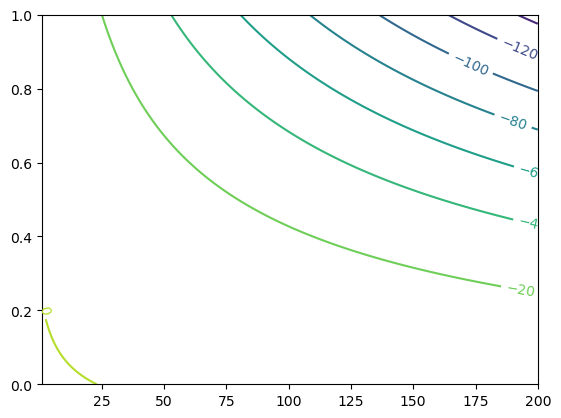

In [54]:
x = np.linspace(1, 200, 1000)
y = np.linspace(0, 1, 1000)
X, Y = np.meshgrid(x, y)
Z = g(X, Y, z=0.2)
C = plt.contour(X, Y, Z)
plt.clabel(C, inline=True, fontsize=10)

In [9]:
g(1)

0.2714000000000001